# Forecasting with SVR using new stats features

In [31]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [34]:
basedir = 'C:/Users/jesus/Documents/School/College/Computer Science/Class/CS 4961 - Boeing MPS/repo/tlm-data/train/generated/engineered/'
file = 'Battery1-1.csv'
path = f'{basedir}{file}'

odasdf = pd.read_csv(path, dtype=np.float32)
odasdf.tail()

,Value,Avg3,Stdev3,Minimum3,Maximum3,Fluctuation3,Avg5,Stdev5,Minimum5,Maximum5,Fluctuation5,Avg7,Stdev7,Minimum7,Maximum7,Fluctuation7,Hour,Minute,Second,Microsecond
6881,13.0,12.500000,0.519615,11.9,12.8,0.9,12.38,0.426615,11.9,12.8,0.9,12.142858,0.553345,11.3,12.8,1.5,8.0,0.0,7.0,204715.0
6882,11.8,12.566667,0.585947,11.9,13.0,1.1,12.50,0.509902,11.9,13.0,1.1,12.314285,0.612178,11.3,13.0,1.7,8.0,0.0,7.0,305414.0
6883,11.3,12.533334,0.642910,11.8,13.0,1.2,12.46,0.563915,11.8,13.0,1.2,12.385715,0.491354,11.8,13.0,1.2,8.0,0.0,7.0,406250.0
6884,11.3,12.033334,0.873689,11.3,13.0,1.7,12.16,0.716240,11.3,13.0,1.7,12.228572,0.639568,11.3,13.0,1.7,8.0,0.0,7.0,506779.0
6885,12.5,11.466666,0.288675,11.3,11.8,0.5,12.04,0.814248,11.3,13.0,1.7,12.128572,0.729644,11.3,13.0,1.7,8.0,0.0,7.0,607320.0


In [35]:
feat = []
for i in 3, 5, 7:
    feat.append(f'Avg{i}')
    feat.append(f'Stdev{i}')
    feat.append(f'Minimum{i}')
    feat.append(f'Maximum{i}')
    feat.append(f'Fluctuation{i}')
feat.append('Hour')
feat.append('Minute')
feat.append('Second')
feat.append('Microsecond')
print(feat)

label = 'Value'

['Avg3', 'Stdev3', 'Minimum3', 'Maximum3', 'Fluctuation3', 'Avg5', 'Stdev5', 'Minimum5', 'Maximum5', 'Fluctuation5', 'Avg7', 'Stdev7', 'Minimum7', 'Maximum7', 'Fluctuation7', 'Hour', 'Minute', 'Second', 'Microsecond']


In [36]:
split = .7
rows = len(odasdf)

train_size = int( rows * split )
print(train_size)

4820


In [37]:
X_train = odasdf[feat][:train_size]
X_train.head()

,Avg3,Stdev3,Minimum3,Maximum3,Fluctuation3,Avg5,Stdev5,Minimum5,Maximum5,Fluctuation5,Avg7,Stdev7,Minimum7,Maximum7,Fluctuation7,Hour,Minute,Second,Microsecond
0,11.233334,0.230940,11.1,11.5,0.4,11.34,0.260768,11.1,11.7,0.6,11.485714,0.498092,11.1,12.5,1.4,7.0,48.0,34.0,226037.0
1,11.533334,0.450925,11.1,12.0,0.9,11.48,0.389872,11.1,12.0,0.9,11.414286,0.338765,11.1,12.0,0.9,7.0,48.0,34.0,326727.0
2,11.666667,0.288675,11.5,12.0,0.5,11.44,0.371484,11.1,12.0,0.9,11.457143,0.325869,11.1,12.0,0.9,7.0,48.0,34.0,427272.0
3,11.633333,0.321455,11.4,12.0,0.6,11.50,0.324037,11.1,12.0,0.9,11.471429,0.319970,11.1,12.0,0.9,7.0,48.0,34.0,527970.0
4,11.633333,0.321455,11.4,12.0,0.6,11.68,0.294958,11.4,12.0,0.6,11.514286,0.371612,11.1,12.0,0.9,7.0,48.0,34.0,628777.0


In [38]:
y_train = odasdf[label][:train_size]
y_train.head()

0    12.0
1    11.5
2    11.4
3    12.0
4    11.1
Name: Value, dtype: float32

In [39]:
X_test = odasdf[feat][train_size:]
X_test.tail()

,Avg3,Stdev3,Minimum3,Maximum3,Fluctuation3,Avg5,Stdev5,Minimum5,Maximum5,Fluctuation5,Avg7,Stdev7,Minimum7,Maximum7,Fluctuation7,Hour,Minute,Second,Microsecond
6881,12.500000,0.519615,11.9,12.8,0.9,12.38,0.426615,11.9,12.8,0.9,12.142858,0.553345,11.3,12.8,1.5,8.0,0.0,7.0,204715.0
6882,12.566667,0.585947,11.9,13.0,1.1,12.50,0.509902,11.9,13.0,1.1,12.314285,0.612178,11.3,13.0,1.7,8.0,0.0,7.0,305414.0
6883,12.533334,0.642910,11.8,13.0,1.2,12.46,0.563915,11.8,13.0,1.2,12.385715,0.491354,11.8,13.0,1.2,8.0,0.0,7.0,406250.0
6884,12.033334,0.873689,11.3,13.0,1.7,12.16,0.716240,11.3,13.0,1.7,12.228572,0.639568,11.3,13.0,1.7,8.0,0.0,7.0,506779.0
6885,11.466666,0.288675,11.3,11.8,0.5,12.04,0.814248,11.3,13.0,1.7,12.128572,0.729644,11.3,13.0,1.7,8.0,0.0,7.0,607320.0


In [40]:
y_test = odasdf[label][train_size:]
y_test.tail()

6881    13.0
6882    11.8
6883    11.3
6884    11.3
6885    12.5
Name: Value, dtype: float32

In [41]:
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE is', rmse)

C:\Programs\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RMSE is 0.5835005260362957


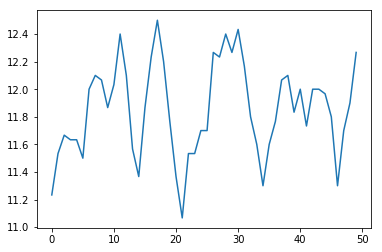

In [47]:
X_train['Avg3'][0:50].plot()

(0, 96)

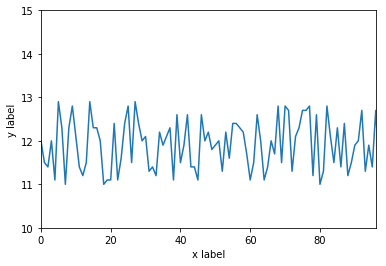

In [74]:
plt.plot(y_train)
plt.xlabel('x label')
plt.ylabel('y label')
plt.ylim(10,15)
plt.xlim(0, train_size//50)

(0, 2066)

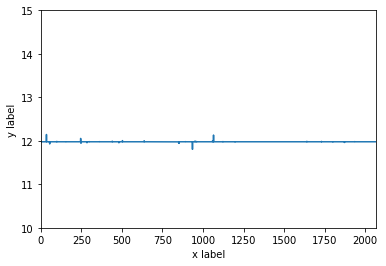

In [68]:
plt.plot(y_pred)
plt.xlabel('x label')
plt.ylabel('y label')
plt.ylim(10,15)
plt.xlim(0, rows-train_size)